# Comparison of chlorophyll data from different sensors

Different ocean color sensors have been launched since 1997 to provide continuous global ocean color data. Unfortunately, because of differences in sensor design and calibration, chlorophyll-a concentration values don’t match during their periods of overlap, making it challenging to study long-term trends.

As an example, we are going to plot time-series of mean chlorophyll a concentration from various sensors from 1997 to 2019 to look at the periods of overlap. 
We are going to download data MODIS (2002-2017) and VIIRS (2018-2020) and combines 2 sensors into a homogeneous time-series.

First, let's load all the packages needed:

In [1]:
import urllib.request 
import xarray as xr 
import netCDF4 as nc

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 

import warnings

warnings.filterwarnings('ignore')
 

## Get Lake Erie dailly MODIS data, which starts in 2002

Go to ERDDAP to find the name of the dataset for dailly MODIS data: LE_CHL_MODIS_Daily

You should always examine the dataset in ERDDAP to check the date range, names of the variables and dataset ID, to make sure your griddap calls are correct: 
https://coastwatch.glerl.noaa.gov/erddap/griddap/LE_CHL_MODIS_Daily.html

- let's download data for Lake Erie:

In [2]:
#from urllib.parse import quote
 
#url='https://coastwatch.glerl.noaa.gov/erddap/griddap/LE_CHL_MODIS_Daily.nc?chlorophyll[(2002-08-07T19:05:00Z):1:(2017-10-22T18:00:00Z)][(41.0051550293714):1:(42.9950003885447)][(-83.4950003885448):1:(-78.505388156246)]'
#new_url = quote(url)
#new_url
url='https://coastwatch.glerl.noaa.gov/erddap/griddap/LE_CHL_MODIS_Daily.nc?chlorophyll%5B(2002-08-07T19:05:00Z):1:(2017-10-22T18:00:00Z)%5D%5B(41.0051550293714):1:(42.9950003885447)%5D%5B(-83.4950003885448):1:(-78.505388156246)%5D'

In [3]:
url

'https://coastwatch.glerl.noaa.gov/erddap/griddap/LE_CHL_MODIS_Daily.nc?chlorophyll%5B(2002-08-07T19:05:00Z):1:(2017-10-22T18:00:00Z)%5D%5B(41.0051550293714):1:(42.9950003885447)%5D%5B(-83.4950003885448):1:(-78.505388156246)%5D'

In [4]:
urllib.request.urlretrieve(url, "e_chl_modis.nc")

('e_chl_modis.nc', <http.client.HTTPMessage at 0x1b854ee5ed0>)

#### - let's use xarray to extract the data from the downloaded file:

In [5]:
e_m_ds = xr.open_dataset('e_chl_modis.nc',decode_cf=False)

In [6]:
e_m_ds.coords

Coordinates:
  * time       (time) float64 1.029e+09 1.029e+09 ... 1.509e+09 1.509e+09
  * latitude   (latitude) float64 41.01 41.02 41.03 41.04 ... 42.98 42.99 43.0
  * longitude  (longitude) float64 -83.5 -83.49 -83.48 ... -78.53 -78.52 -78.51

In [7]:
e_m_ds.time.values

array([1.02874710e+09, 1.02883020e+09, 1.02891930e+09, 1.02900240e+09,
       1.02960750e+09, 1.02986850e+09, 1.03030170e+09, 1.03047360e+09,
       1.03064580e+09, 1.03081770e+09, 1.03090680e+09, 1.03125090e+09,
       1.03142310e+09, 1.03151190e+09, 1.03159500e+09, 1.03220010e+09,
       1.03228920e+09, 1.03263330e+09, 1.03323840e+09, 1.03341060e+09,
       1.03392660e+09, 1.03462080e+09, 1.05457950e+09, 1.05613410e+09,
       1.05673920e+09, 1.05708330e+09, 1.05717240e+09, 1.05812160e+09,
       1.05820470e+09, 1.05838260e+09, 1.05855480e+09, 1.05863790e+09,
       1.05907080e+09, 1.05950400e+09, 1.05958710e+09, 1.06028130e+09,
       1.06079730e+09, 1.06088640e+09, 1.06123050e+09, 1.06157460e+09,
       1.06166370e+09, 1.06200780e+09, 1.06226880e+09, 1.06278510e+09,
       1.06287390e+09, 1.06304610e+09, 1.06321800e+09, 1.06373430e+09,
       1.06382340e+09, 1.06408440e+09, 1.06416750e+09, 1.06554990e+09,
       1.06563870e+09, 1.06581090e+09, 1.06589400e+09, 1.09138230e+09,
      

In [8]:
e_m_ds.data_vars

Data variables:
    chlorophyll  (time, latitude, longitude) float64 ...

In [9]:
e_m_ds.chlorophyll.shape

(506, 200, 500)

The downloaded data contains only one variable: chlorophyll.

#### - Extract the dates corresponding to the data of each day:

In [10]:
e_m_dates=nc.num2date(e_m_ds.time,e_m_ds.time.units, only_use_cftime_datetimes=False, 
                        only_use_python_datetimes=True )
e_m_dates
#e_m_ds.time

array([real_datetime(2002, 8, 7, 19, 5),
       real_datetime(2002, 8, 8, 18, 10),
       real_datetime(2002, 8, 9, 18, 55),
       real_datetime(2002, 8, 10, 18, 0),
       real_datetime(2002, 8, 17, 18, 5),
       real_datetime(2002, 8, 20, 18, 35),
       real_datetime(2002, 8, 25, 18, 55),
       real_datetime(2002, 8, 27, 18, 40),
       real_datetime(2002, 8, 29, 18, 30),
       real_datetime(2002, 8, 31, 18, 15),
       real_datetime(2002, 9, 1, 19, 0),
       real_datetime(2002, 9, 5, 18, 35),
       real_datetime(2002, 9, 7, 18, 25),
       real_datetime(2002, 9, 8, 19, 5),
       real_datetime(2002, 9, 9, 18, 10),
       real_datetime(2002, 9, 16, 18, 15),
       real_datetime(2002, 9, 17, 19, 0),
       real_datetime(2002, 9, 21, 18, 35),
       real_datetime(2002, 9, 28, 18, 40),
       real_datetime(2002, 9, 30, 18, 30),
       real_datetime(2002, 10, 6, 17, 50),
       real_datetime(2002, 10, 14, 18, 40),
       real_datetime(2003, 6, 2, 18, 45),
       real_datetime(2003

In [11]:
e_m_ds.chlorophyll.attrs['_FillValue']

-999.0

In [12]:
# In chlorophyll array, replace -999 with nan
nan_e_m_ds_chlorophyll = e_m_ds.chlorophyll.where(e_m_ds.chlorophyll.values != e_m_ds.chlorophyll.attrs['_FillValue'])

#print(nan_e_m_ds_chlorophyll[0,100,:] )
print(nan_e_m_ds_chlorophyll)


<xarray.DataArray 'chlorophyll' (time: 506, latitude: 200, longitude: 500)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
       


#### - Compute the monthly mean over the region data :

In [13]:
# Create list of string contains 'year month day hours minutes seconds'
d_list = []
[ d_list.append(dt.strftime("%Y %m %d %H %M %S")) for dt in e_m_dates]

#print(min(d_list))
#print(max(d_list))

mn = '08'
yr = '2009'

i_list = []
for n, d in enumerate(d_list):
    d_t = d.split()
    if d_t[0] == yr and d_t[1] == mn:
        # print( n, d_t)
        i_list.append(n)  # get all index of data for yr and mn
    
    #print(n, d)
#print(i_list)

# axis=0 is time line
chl_avg_img = nan_e_m_ds_chlorophyll.values[i_list[0]:i_list[-1]].mean(axis=0)
print(chl_avg_img.shape)

(200, 500)


In [14]:
# find max and min value in man_sst
print(np.nanmin(chl_avg_img))
print(np.nanmax(chl_avg_img))

0.4942583243052167
100.5


In [15]:
# number of colors
levs = np.arange(np.nanmin(chl_avg_img), np.nanmax(chl_avg_img), 0.3)
len(levs)

334

In [16]:
# init a color list
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]

cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))


#### -Draw the image of monthly mean

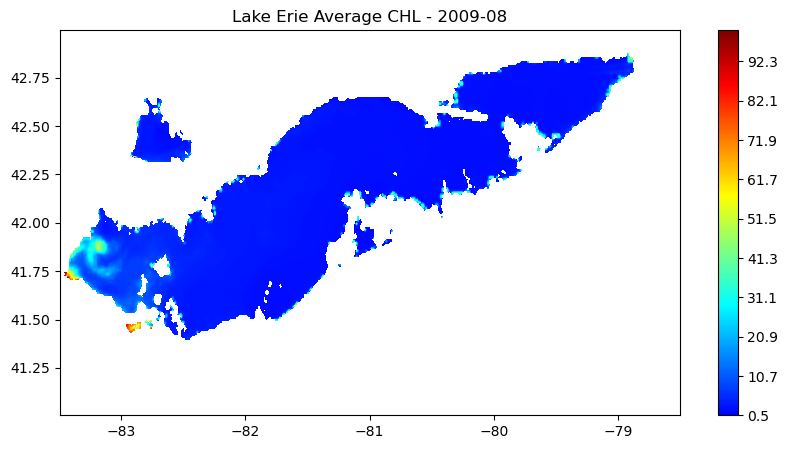

In [17]:
plt.subplots(figsize=(10, 5))

#plot image chl_avg_img
plt.contourf(e_m_ds.longitude, e_m_ds.latitude, chl_avg_img, levs,cmap=cm)

#plot the color scale
plt.colorbar()

#example of how to add points to the map
#plt.scatter(np.linspace(-82,-80.5,num=4),np.repeat(42,4),c='black')

#example of how to add a contour line
#step = np.arange(1,100, 10)
#plt.contour(e_m_ds.longitude, e_m_ds.latitude, chl_avg_img,levels=step,linewidths=1)

#plot title
plt.title("Lake Erie Average CHL - " + yr + '-' + mn)
plt.show()

#### -  Compute the Lake Erie chlorophyll monthly mean from 2002 to 2017

In [18]:
d_list = []
[ d_list.append(dt.strftime("%Y %m %d %H %M %S")) for dt in e_m_dates]

#print(min(d_list))
#print(max(d_list))
m_yr_list = []
[ m_yr_list.append(str(dt.year)) for dt in e_m_dates if str(dt.year) not in m_yr_list ]

print(m_yr_list)
print(len(m_yr_list))

mn_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
m_chl_avg_list = []
for yr in m_yr_list:
    for mn in mn_list:
        
        i_list = []
        for n, d in enumerate(d_list):
            d_t = d.split()
            #print(type(yr), type(mn), d_t)
            if d_t[0] == yr and d_t[1] == mn:
                #print( n, d_t)
                i_list.append(n)  # get all index of data for yr and mn
    
        #print(i_list, 'aaa')

        if i_list:
            #print('bbb')
            # axis=0 is time line
            m_chl_avg = np.nanmean(nan_e_m_ds_chlorophyll.values[i_list[0]:i_list[-1]],axis=(0,1,2))
            #print(i_list)
            #print('ccc', chl_avg)
        else:
            m_chl_avg = np.NAN
        #print(yr, mn, chl_avg)
        
        m_chl_avg_list.append(m_chl_avg)  # add each month mean data into list
print(len(m_chl_avg_list))
print(m_chl_avg_list)

['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
16
192
[nan, nan, nan, nan, nan, nan, nan, 5.435731696799938, 5.390267233342085, 8.081265781572409, nan, nan, nan, nan, nan, nan, nan, 6.781491128619841, 6.109469974086832, 4.314376310517935, 6.79798886383254, 7.093404713878546, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.368433526104296, 7.64127887019175, 10.885647119544341, nan, nan, nan, nan, nan, nan, nan, 5.840624163588643, 5.249259500793706, 4.616988228955723, 7.096526864254263, 4.819230418185895, nan, nan, nan, nan, nan, nan, nan, 4.510100122676393, 4.086877241390418, 8.282441959350821, nan, nan, nan, nan, nan, nan, nan, nan, nan, 6.047208513833891, 4.158334577045406, 5.306521407370655, 4.870477621191157, nan, nan, nan, nan, nan, nan, nan, nan, 4.399793136125678, 4.948825492811119, 6.928067277764852, 7.537945121660116, 10.463871652015316, nan, nan, nan, nan, nan, nan, nan, 5.468607769352359, 4.33143

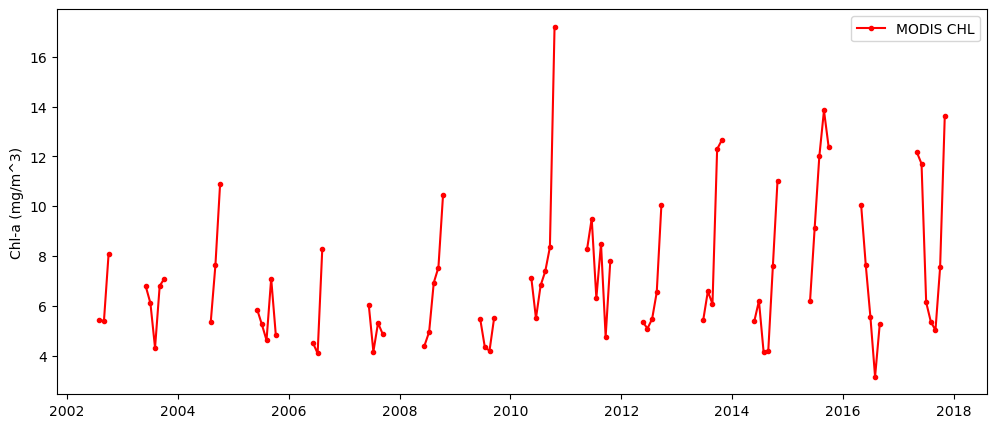

In [19]:
x = np.linspace(2002, 2018,num=192)   # contains data from 2002 to 2017 (not 2018)

#units = e_m_ds.chlorophyll.attrs['units']

plt.figure(figsize=(12,5)) 
plt.plot(x,m_chl_avg_list,label='MODIS CHL',c='red',marker='.',linestyle='-')
plt.ylabel('Chl-a (mg/m^3)')
plt.legend()

## Get Lake Erie monthly VIIRS data, which starts in 2018

In [20]:
#url2='https://coastwatch.glerl.noaa.gov/erddap/griddap/LE_CHL_VIIRS_Monthly_Avg.nc?Chlorophyll[(2018-05-15T12:00:00Z):1:(2023-06-15T18:08:43Z)][(41.2690208353804):1:(43.017997272827)][(-83.6574899492178):1:(-78.4429490894234)]'
url2='https://coastwatch.glerl.noaa.gov/erddap/griddap/LE_CHL_VIIRS_Monthly_Avg.nc?Chlorophyll%5B(2018-05-15T12:00:00Z):1:(2022-09-15T12:00:00Z)%5D%5B(41.2690208353804):1:(43.017997272827)%5D%5B(-83.6574899492178):1:(-78.4429490894234)%5D'
urllib.request.urlretrieve(url2, "e_viirs_chl.nc")

('e_viirs_chl.nc', <http.client.HTTPMessage at 0x1b85501c390>)

In [21]:
e_v_ds = xr.open_dataset('e_viirs_chl.nc',decode_cf=False)

In [22]:
print(e_v_ds)

<xarray.Dataset>
Dimensions:      (time: 53, latitude: 271, longitude: 806)
Coordinates:
  * time         (time) float64 1.526e+09 1.529e+09 ... 1.661e+09 1.663e+09
  * latitude     (latitude) float64 41.27 41.28 41.28 ... 43.01 43.01 43.02
  * longitude    (longitude) float64 -83.66 -83.65 -83.64 ... -78.45 -78.44
Data variables:
    Chlorophyll  (time, latitude, longitude) float32 ...
Attributes: (12/35)
    cdm_data_type:                  Grid
    colorBarMaximum:                30.0
    colorBarMinimum:                1.0
    colorBarScale:                  Log
    Conventions:                    CF-1.6, COARDS, ACDD-1.3
    Easternmost_Easting:            -78.4429490894234
    ...                             ...
    summary:                        Color Producing Agent (CPA) Chlorophyll, ...
    testOutOfDate:                  now-58days
    time_coverage_end:              2022-09-15T12:00:00Z
    time_coverage_start:            2018-05-15T12:00:00Z
    title:                     

In [23]:
nan_e_v_ds_chlorophyll = e_v_ds.Chlorophyll.where(e_v_ds.Chlorophyll.values != e_v_ds.Chlorophyll.attrs['_FillValue'])

v_chl_avg = np.nanmean(nan_e_v_ds_chlorophyll,axis=(1,2))
print(v_chl_avg)
print(len(v_chl_avg))

[ 7.387662   7.130833   6.8531957  7.067971  10.981218   9.158773
 13.29338    9.700653  13.87522   37.8129    17.29175   14.630282
 10.530294   8.1118765  6.0679684  7.7413135  8.563966  18.578035
 13.02914    9.297082  13.149483  14.124588  12.059988  12.409704
  8.531175   6.5784163  4.954806   6.5634985  7.719488  11.749591
 14.757857  16.201027  10.846249  11.817226  15.175478   9.953331
  9.3959055  5.0962305  4.7101736  6.511713  10.5009165  8.693387
 10.755935  25.140661  14.031336  17.865644  16.326204   8.967016
  8.982615   4.526909   4.958596   6.2696676  6.026227 ]
53


In [24]:
e_v_dates=nc.num2date(e_v_ds.time,e_v_ds.time.units, only_use_cftime_datetimes=False, 
                        only_use_python_datetimes=True )
e_v_dates 


array([real_datetime(2018, 5, 15, 12, 0),
       real_datetime(2018, 6, 15, 12, 0),
       real_datetime(2018, 7, 15, 12, 0),
       real_datetime(2018, 8, 15, 12, 0),
       real_datetime(2018, 9, 15, 12, 0),
       real_datetime(2018, 10, 15, 12, 0),
       real_datetime(2018, 11, 15, 12, 0),
       real_datetime(2018, 12, 15, 12, 0),
       real_datetime(2019, 1, 15, 12, 0),
       real_datetime(2019, 2, 15, 12, 0),
       real_datetime(2019, 3, 15, 12, 0),
       real_datetime(2019, 4, 15, 12, 0),
       real_datetime(2019, 5, 15, 12, 0),
       real_datetime(2019, 6, 15, 12, 0),
       real_datetime(2019, 7, 15, 12, 0),
       real_datetime(2019, 8, 15, 12, 0),
       real_datetime(2019, 9, 15, 12, 0),
       real_datetime(2019, 10, 15, 12, 0),
       real_datetime(2019, 11, 15, 12, 0),
       real_datetime(2019, 12, 15, 12, 0),
       real_datetime(2020, 1, 15, 12, 0),
       real_datetime(2020, 2, 15, 12, 0),
       real_datetime(2020, 3, 15, 12, 0),
       real_datetime(2020, 4

In [25]:
v_chl_avg = np.nanmean(nan_e_v_ds_chlorophyll.values,axis=(1,2))
v_chl_avg

array([ 7.387662 ,  7.130833 ,  6.8531957,  7.067971 , 10.981218 ,
        9.158773 , 13.29338  ,  9.700653 , 13.87522  , 37.8129   ,
       17.29175  , 14.630282 , 10.530294 ,  8.1118765,  6.0679684,
        7.7413135,  8.563966 , 18.578035 , 13.02914  ,  9.297082 ,
       13.149483 , 14.124588 , 12.059988 , 12.409704 ,  8.531175 ,
        6.5784163,  4.954806 ,  6.5634985,  7.719488 , 11.749591 ,
       14.757857 , 16.201027 , 10.846249 , 11.817226 , 15.175478 ,
        9.953331 ,  9.3959055,  5.0962305,  4.7101736,  6.511713 ,
       10.5009165,  8.693387 , 10.755935 , 25.140661 , 14.031336 ,
       17.865644 , 16.326204 ,  8.967016 ,  8.982615 ,  4.526909 ,
        4.958596 ,  6.2696676,  6.026227 ], dtype=float32)

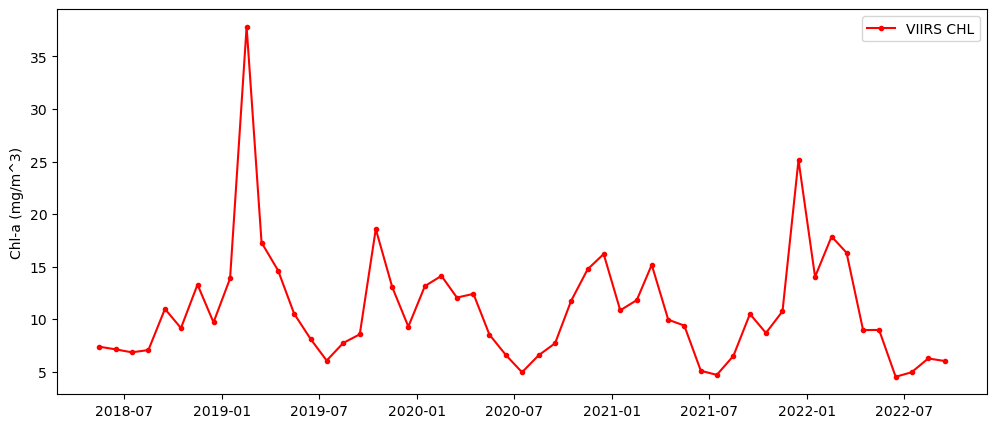

In [26]:
plt.figure(figsize=(12,5)) 
plt.plot(e_v_dates,v_chl_avg,label='VIIRS CHL',c='red',marker='.',linestyle='-')
plt.ylabel('Chl-a (mg/m^3)')
plt.legend()

In [27]:
#e_v_ds.close()
!jupyter nbconvert --to html GL_python_tutorial2.ipynb

[NbConvertApp] Converting notebook GL_python_tutorial2.ipynb to html
[NbConvertApp] Writing 819692 bytes to GL_python_tutorial2.html
